# EDA 

### Importo las librerias necesarias para comenzar el proceso de EDA

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import herramientas
import warnings
warnings.filterwarnings("ignore")

Inicialmente realizamos la union de los datasets **'hechos_limpio.csv'**  y **'victimas_limpio.csv'** por medio de la columna'Id'. Antes de realizar dicha union revisamos las dimensiones de los datasets y verificamos la existencia de nulos

In [36]:
df_hechos=pd.read_csv(r'data\hechos_limpio.csv')
df_victimas=pd.read_csv(r'data\victimas_limpio.csv')

In [37]:
df_hechos

,Id,Cantidad de victimas,Fecha,Año,Mes,Dia,Hora,Hora en entero,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Si,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Si,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,Si,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,Si,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,Si,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",Si,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,Si,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",No,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [38]:
df_victimas

,Id,Rol,Sexo,Edad
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70
2,2016-0003,CONDUCTOR,MASCULINO,30
3,2016-0004,CONDUCTOR,MASCULINO,18
4,2016-0005,CONDUCTOR,MASCULINO,29
...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43
715,2021-0095,CONDUCTOR,MASCULINO,27


In [39]:
herramientas.verifica_tipo_y_nulos(df_victimas)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Id,[<class 'str'>],100.0,0.0,0
1,Rol,[<class 'str'>],100.0,0.0,0
2,Sexo,[<class 'str'>],100.0,0.0,0
3,Edad,[<class 'int'>],100.0,0.0,0


In [40]:
herramientas.verifica_tipo_y_nulos(df_hechos)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Id,[<class 'str'>],100.0,0.0,0
1,Cantidad de victimas,[<class 'int'>],100.0,0.0,0
2,Fecha,[<class 'str'>],100.0,0.0,0
3,Año,[<class 'int'>],100.0,0.0,0
4,Mes,[<class 'int'>],100.0,0.0,0
5,Dia,[<class 'int'>],100.0,0.0,0
6,Hora,[<class 'str'>],100.0,0.0,0
7,Hora en entero,[<class 'int'>],100.0,0.0,0
8,Lugar del hecho,[<class 'str'>],100.0,0.0,0
9,Tipo de calle,[<class 'str'>],100.0,0.0,0


In [41]:
df_homicidios=pd.merge(df_hechos,df_victimas,on='Id', how='left')
df_homicidios

,Id,Cantidad de victimas,Fecha,Año,Mes,Dia,Hora,Hora en entero,Lugar del hecho,Tipo de calle,...,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60


Verificamos valores nulos y tipo de datos

In [42]:
herramientas.verifica_tipo_y_nulos(df_homicidios)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Id,[<class 'str'>],100.0,0.0,0
1,Cantidad de victimas,[<class 'int'>],100.0,0.0,0
2,Fecha,[<class 'str'>],100.0,0.0,0
3,Año,[<class 'int'>],100.0,0.0,0
4,Mes,[<class 'int'>],100.0,0.0,0
5,Dia,[<class 'int'>],100.0,0.0,0
6,Hora,[<class 'str'>],100.0,0.0,0
7,Hora en entero,[<class 'int'>],100.0,0.0,0
8,Lugar del hecho,[<class 'str'>],100.0,0.0,0
9,Tipo de calle,[<class 'str'>],100.0,0.0,0


### Distribucion Diaria (momento del dia)

Para este análisis se creó una nueva columna donde se caracterizaran los diferentes momentos del día con el siguiente criterio:

- Mañana: de 6:00 a 10:59
- Medio día: de 11:00 a 13:59
- Tarde: de 14:00 a 18:59
- Noche: de 19:00 a 23:59
- Madrugada: de 24:00 a 05:59

In [43]:
df_homicidios['Hora']=pd.to_datetime(df_homicidios['Hora'])

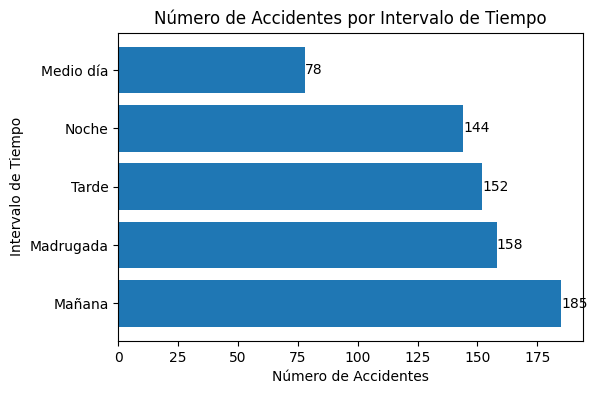

In [44]:
herramientas.accidentes_por_intervalo(df_homicidios)

Se puede observar que la mayoria de los accidentes ocurren durante la mañana y al mediodía se registran menos accidentes fatales respecto a los otros momentos del día.

Se procede a identificar la hora exacta en la que dichos accidentes ocurren

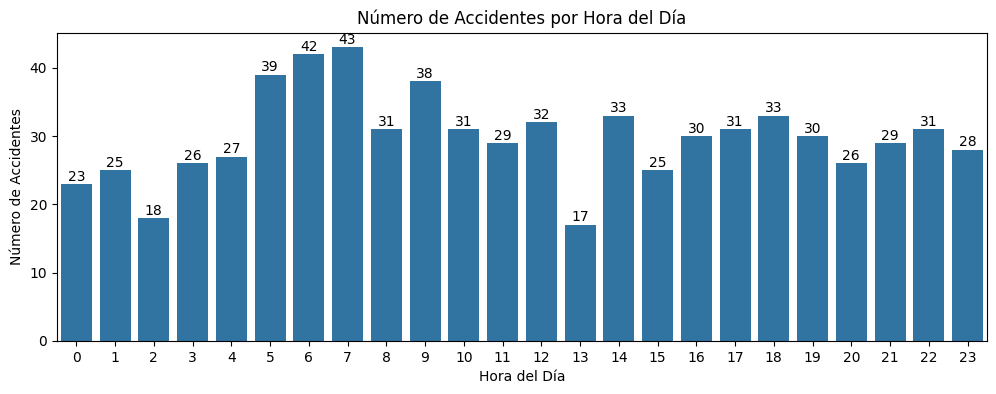

In [45]:
herramientas.accidentes_por_hora(df_homicidios)

Se observa hora a hora la distribución de los accidentes, se puede identificar que en el horario entre las 5 a las 7 de la mañana como el de mayor cantidad de accidentes. Luego se observa un poco a las 9 de la mañana seguido de cuatro momentos puntuales como lo son,las 12 hs las 14 hs, las 18 hs y las 22 hs.

### Distribucion Semanal

Se busca encontrar patrones en la cantidad de accidentes a lo largo de la semana.

El día de la semana con menor cantidad de víctimas tiene 101 víctimas
El día de la semana con mayor cantidad de víctimas tiene 117 víctimas
La diferencia porcentual es de 15.84


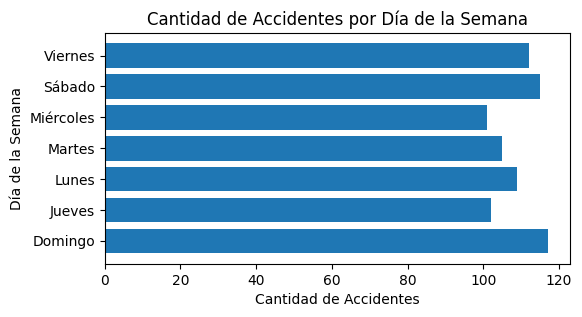

In [46]:
herramientas.victimas_por_dia(df_homicidios)

Considerando el total de los registros, la distribución de los accidentes tienden a registrarse entre los viernes a lunes, con el máximo registrado el día Domingo y el mínimo el día Miercoles.

### Distribucion Mensual

Se observa la cantidad total de accidentes fatales con una distribución mensual

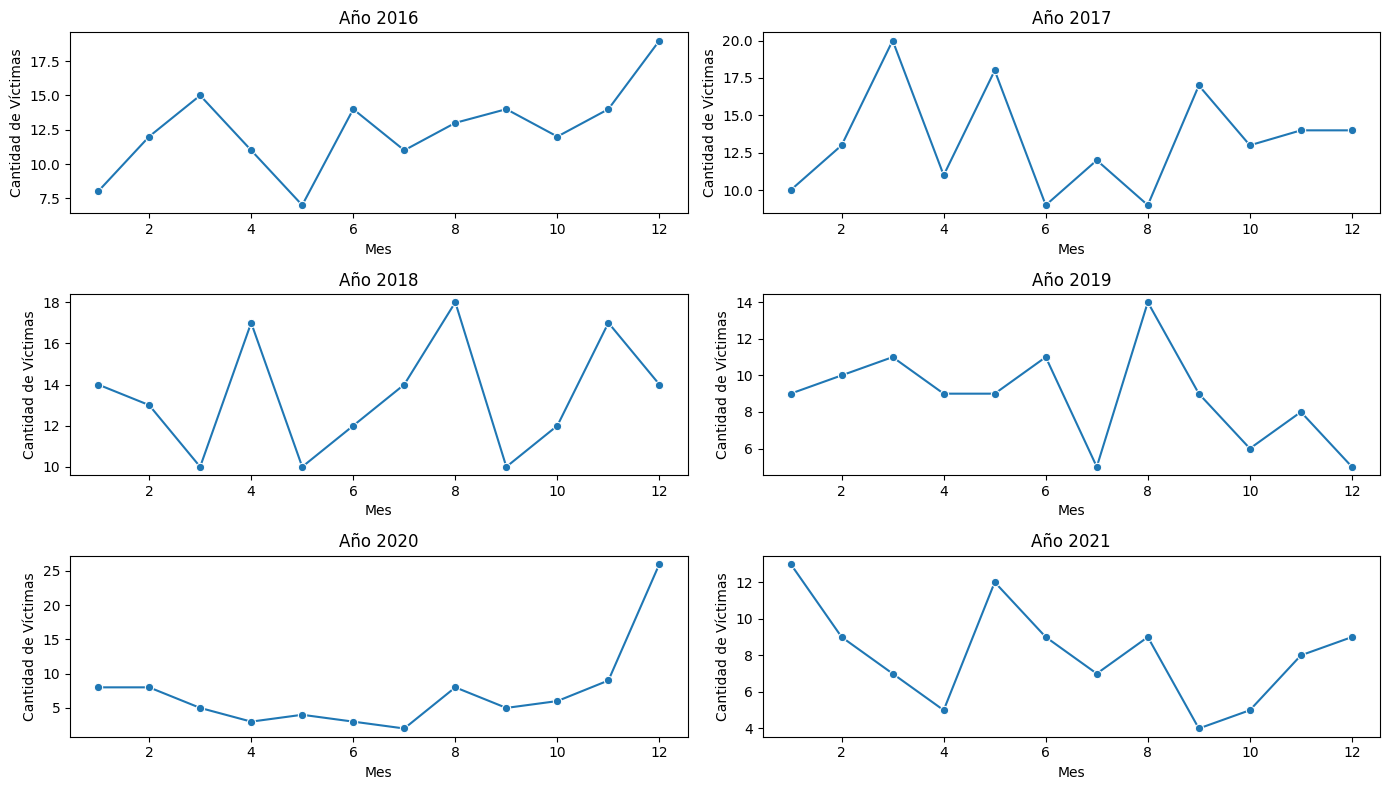

In [47]:
herramientas.victimas_mensuales(df_homicidios)

Se observa un patrón a lo largo del año comparando entre los distintos años. Los picos de accidentes fatales no se observan en los mismos meses en los distintos años registrados. Lo que se observa con claridad es la disminución notable de accidentes fatales desde Noviembre de 2019 hasta Noviembre de 2020, relacionado con las medidas de cuarentena por la pandemia COVID-19.

In [48]:
herramientas.total_victimas_por_mes(df_homicidios)

alt.Chart(...)

Menor cantidad de victimas: 51 victimas
Mayor cantidad de victimas: 87 victimas


Se puede observar que el patrón que extiste a lo largo del año es un pico de accidentes en el mes de diciembre, siendo los meses con mas accidentes fatales Diciembre, Agosto y Noviembre . El mes con menos cantidad de accidentes fatales registrados es Julio y Octubre.

### Dias de la semana vs fines de semana

Se busca en este punto es comparar la cantidad de accidentes en los días de semana (de lunes a viernes) y los fines de semana (sábados y domingos).

In [49]:
herramientas.accidentes_por_tipo_dia(df_homicidios)

alt.Chart(...)

Día con menor cantidad de accidentes: 212 accidentes
Día con mayor cantidad de accidentes: 505 accidentes


Se puede observar que la mayor cantidad de accidentes registrados fue durante la semana, siendo algo menos de la mitad los ocurridos el fin de semana. Esto contradice lo observado en el anterior análisis, donde se vieron las mayores cantidades entre el viernes y el lunes, aunque al acumular de lunes a viernes es una sola medida, es que los días de semana acumulan mas que los fines de semana.

### Sexo de las victimas

Se intenta analizar la relación del sexo con las cantidades de accidente, los roles y el tipo de vehículo que ocupaba o si era peatón.

In [50]:
herramientas.resumen_victimas_sexo(df_homicidios)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

Se observa la diferencia en la cantidad de victimas masculina por sobre las femeninas. Se aprecia la diferencia sobre todo en Conductor, donde la mayor proporción son masculinos y lo que se observa a grandes rasgos es en la grafica por Tipo de vehiculo', que Motos es el vehículo con mayor proporción de accidentes con una alta proporción de masculinos. Los Peatones también son las victimas con mayor cantidad de fallecimientos en accidentes, con mayor proporción de masculinos, pero menos pronunciada la diferencia.

### Edad de las Victimas

Utilizo la grafica de histograma y boxplot para poder observar la existencia de un patron en los datos 

In [51]:
herramientas.grafico_edades(df_homicidios)

alt.Chart(...)

alt.Chart(...)

Se observa que mas de la mitad de los accidentados es menor de 55 años, con una mediana de 39 años (Boxplot). No se observan edades atípicas(Outlaiers). Se observa un mínimo de 1 año y un máximo de 95 años, esto tiene que ver con el registro de todas las victimas, no necesariamente son las que manejaban al momento del accidente. El histograma se observa con una distribución algo sesgada a la derecha, concentrando la mayor cantidad de accidentes entre los 20 a 40 años.

- Relacion entre los distintos generos (Masculino y Femenino)

In [52]:
herramientas.accidentes_por_anio_y_genero(df_homicidios)

alt.Chart(...)

In [53]:
# Se observan los datos numéricos de ese gráfico
cantidad_de_accidentes = df_homicidios.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad accidentes')
cantidad_de_accidentes

,Año,Sexo,Cantidad accidentes
0,2016,FEMENINO,27
1,2016,MASCULINO,119
2,2017,FEMENINO,36
3,2017,MASCULINO,104
4,2018,FEMENINO,38
5,2018,MASCULINO,111
6,2019,FEMENINO,27
7,2019,MASCULINO,77
8,2020,FEMENINO,16
9,2020,MASCULINO,65


En el gráfico anterior se puede ver que hasta el 2019 había una tendencia creciente en las edades de las mujeres fallecidas que en hombres, disminuyendo para 2020. En cuanto a los hombres, se observa una leve tendencia a la disminucion de fallecimientos hasta el año 2020.

Analizare cómo se distribuyen las edades para la condición de la victima, es decir el 'rol' en el hecho.

In [54]:
herramientas.victimas_edad_y_rol(df_homicidios)

alt.Chart(...)

Se encuentra que es similar la edad del Conductor y del Pasajero Acompañante, siendo de alrededor de los 35 años. Se observa que la edad mínima del Conductor es de alrededor de los 17 años, pero en los demás roles es posible encontrar victimas de menor edad, lo que se se relaciona con ser niños que estan siendo trasladados.

En el caso de los Peatones (Peaton) se observa mayor dispersión de las edades, desde niños muy pequeños a adultos mayores de 95 años.

Si bien en Conductor y Pasajero Acompañante se observan algunos valores atípicos, los mismos son edades esperables y se consideran casos especiales en el conjunto de datos.

Por ultimo, para el rol de ciciliesta se observa una edad mediana de las victimas de 42 años, tambien con una dispresion entre 5 años y 86 años de edad

### Participantes en Accidentes

Se analizan las cantidades de victimas en función de los medios de transporte o vehículos que participaron de hecho

In [55]:
herramientas.participantes_victimas_accidentes(df_homicidios)

alt.Chart(...)

Se observa que la mayor cantidad de víctimas ocurren por hechos donde se involucran peatones con pasajeros(Peaton-Pasajero). Peatón es cualquier víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a y Pasajero es cualquier personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia (segun el diccionario de datos). Observare los casos de estos registros, para encontrar algun sentido a la grafica anterior.

In [56]:
df_homicidios.columns

Index(['Id', 'Cantidad de victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Hora',
       'Hora en entero', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x', 'Pos y',
       'Participantes', 'Victima', 'Acusado', 'Rol', 'Sexo', 'Edad',
       'Intervalo', 'HoraDia', 'DiaSemanaNum', 'DiaSemana', 'Dia de la semana',
       'Tipo de dia'],
      dtype='object')

In [57]:
df_homicidios[df_homicidios['Participantes'] == 'PEATON-PASAJEROS'][['Participantes', 'Victima', 'Acusado','Rol']]

,Participantes,Victima,Acusado,Rol
13,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON
21,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON
23,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON
27,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON
34,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON
...,...,...,...,...
679,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON
684,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON
685,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON
705,PEATON-PASAJEROS,PEATON,PASAJEROS,PEATON


Efectivamente se observa que el registro de Participante como Peaton-Pasajero, es que si la víctima es Peatón y el acusado es Pasajero, se esta refiriendo que el hecho ocurrió asociado a una persona que subía, bajaba o se trasladaba por algún medio de **transporte público**. Teniendo en cuenta esta observación hasta confirmar o rechazar por parte de los interesados, a partir de aquí se considerará de esta manera.

Por otra parte, en el gráfico anterior, se llega a apreciar que los hechos que involucran moto, auto y cargas son los que mayor cantidad de víctimas acumulan.

### Calle donde ocurren los Hechos

Se busca en encontrar patrones en relación con el tipo de calle donde ocurren los hechos y si son cruces de o no.

In [58]:
df_homicidios.columns

Index(['Id', 'Cantidad de victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Hora',
       'Hora en entero', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x', 'Pos y',
       'Participantes', 'Victima', 'Acusado', 'Rol', 'Sexo', 'Edad',
       'Intervalo', 'HoraDia', 'DiaSemanaNum', 'DiaSemana', 'Dia de la semana',
       'Tipo de dia'],
      dtype='object')

In [59]:
herramientas.participantes_accidentes_calle_cruce(df_homicidios)

alt.Chart(...)

alt.Chart(...)

Se observa que la mayor cantidad de hechos ocurren en las Avenida y en particular en los Cruces.

### Acusados en Accidentes

Se analiza la cantidad de accidentes por acusados para identificar alguna tendencia en los mismos datos

In [60]:
df_homicidios.columns

Index(['Id', 'Cantidad de victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Hora',
       'Hora en entero', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Cruce',
       'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x', 'Pos y',
       'Participantes', 'Victima', 'Acusado', 'Rol', 'Sexo', 'Edad',
       'Intervalo', 'HoraDia', 'DiaSemanaNum', 'DiaSemana', 'Dia de la semana',
       'Tipo de dia'],
      dtype='object')

In [61]:
herramientas.acusados_en_accidentes(df_homicidios)

alt.Chart(...)

Se observa que la mayor responsabilidad en los hechos registrados es de los conductores de autos, seguidas de pasajeros y cargas ( se refiere a vehículos de carga). En cuanto a Pasajeros tiene sentido en relación con lo interpretado anteriormente, donde el vehículo involucrado es el transporte público, lo que da sentido a lo discutido.

### Conclusion General:
 Los accidentes de tráfico en CABA entre 2016 y 2021 dejaron 717 víctimas. Mayormente involucraron a Hombres, siendo conductores de motos la categoría más afectada. Los accidentes ocurren principalmente en las Mañanas, en Cruces de Avenidas. Las edades de las víctimas varían: Peatones suelen ser mayores. Los conductores de autos tienen mayor responsabilidad en estos incidentes

### Carga del dataset 'homicidios_limpio.csv'

Se procede a guardar los cambios anteriormente realizados en un archivo llamado  **'homicidios_limpio.csv'**

In [62]:
df_homicidios_limpio = 'data/homicidios_limpio.csv'
df_homicidios.to_csv(df_homicidios_limpio, index=False, encoding='utf-8')
print(f'Se guardó el archivo {df_homicidios_limpio}')

Se guardó el archivo data/homicidios_limpio.csv
